# Lifetime vs Recycling Paper
### Cole et al 2021 installations 
### RELIABILITY APPROACHES: PV ICE, modifying lifetime (t50, t90, ProjecT) and Degradation


In [49]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'TEMP' / 'Cole2021')

if not os.path.exists('my_folder'):
    os.makedirs('my_folder')
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Cole2021


In [50]:
MATERIALS = ['glass','aluminium_frames','silver','silicon', 'copper', 'encapsulant']
MATERIAL = MATERIALS[0]

MODULEBASELINE = r'..\..\baselines\baseline_modules_US_100RE2050.csv'



In [51]:
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [52]:
PV_ICE.__version__

'0+untagged.466.gd747044.dirty'

In [53]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

# Simulation 1: Regular PV ICE

In [54]:
MATERIALBASELINE_GLASS = r'..\..\baselines\baseline_material_glass.csv'
MATERIALBASELINE_ALFrames = r'..\..\baselines\baseline_material_aluminium_frames.csv'


In [55]:
r1 = PV_ICE.Simulation(name='PV_ICE', path=testfolder)

r1.createScenario(name='baseline', file=MODULEBASELINE)
r1.scenario['baseline'].addMaterial('glass', file=MATERIALBASELINE_GLASS)
r1.scenario['baseline'].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames)
for mat in range (2, len(MATERIALS)):
    MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['baseline'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)
    


path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Cole2021


# LIFETIMES
In this section, the T50&T90&economic lifetime variables are incremented up and down, and degradation rate is also varied up and down. This explores the incremental effects of different lifetimes and power degradation for PV modules.

### Variables modified on each case:
<li> Case1 -- r4 : mod_lifetime, mod_reliability_t50, mod_reliability_t90
<li> Case2 -- r5: mod_lifetime, mod_reliability_t50, mod_reliability_t90, mod_degradation
<li> Case3 -- r6: mod_degradation


In [8]:
Life_Good = [3, 6, 9, 12, 15, 18, 21, 24]
degradation_Good = [-0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8]
Life_Bad = [element * -1 for element in Life_Good]
degradation_Bad = [0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0, 3.0]

In [ ]:
Life_Good = pd.Series(range(0,22,2)) #this is relative to 30 year module
Life_Bad = pd.Series(range(0,15,2))*-1 #this is relative to 30 year module
Recycling_Range = pd.Series(range(0,100,5)) # this is absolute recycling values
print(Life_Bad)

In [9]:
r4 = PV_ICE.Simulation(name='Reliability_Case1', path=testfolder)

for i in range(0, len(Life_Good)):
    scenname = 'Lifetime_Improvements_of_'+str(Life_Good[i])+'_years'
    r4.createScenario(name=scenname, file=MODULEBASELINE)
    r4.scenario[scenname].data['mod_reliability_t50'] = r4.scenario[scenname].data['mod_reliability_t50'] + Life_Good[i]
    r4.scenario[scenname].data['mod_reliability_t90'] = r4.scenario[scenname].data['mod_reliability_t90'] + Life_Good[i]
    r4.scenario[scenname].data['mod_lifetime'] = r4.scenario[scenname].data['mod_lifetime'] + Life_Good[i]
    r4.scenario[scenname].addMaterial('glass', file=MATERIALBASELINE_GLASS)
    r4.scenario[scenname].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames)
    for mat in range (2, len(MATERIALS)):
        MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
        r4.scenario[scenname].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

    scenname = 'Lifetime_Decline_of_'+str(Life_Good[i])+'_years'
    r4.createScenario(name=scenname, file=MODULEBASELINE)
    r4.scenario[scenname].data['mod_reliability_t50'] = r4.scenario[scenname].data['mod_reliability_t50'] + Life_Bad[i]
    r4.scenario[scenname].data['mod_reliability_t90'] = r4.scenario[scenname].data['mod_reliability_t90'] + Life_Bad[i]
    r4.scenario[scenname].data['mod_lifetime'] = r4.scenario[scenname].data['mod_lifetime'] + Life_Bad[i]
    r4.scenario[scenname].data['mod_reliability_t50'][r4.scenario[scenname].data['mod_reliability_t50']<=3.0] = 1.0
    r4.scenario[scenname].data['mod_reliability_t90'][r4.scenario[scenname].data['mod_reliability_t90']<=3.0] = 2.0
    r4.scenario[scenname].data['mod_lifetime'][r4.scenario[scenname].data['mod_lifetime']<=3.0] = 3.0

    r4.scenario[scenname].addMaterial('glass', file=MATERIALBASELINE_GLASS)
    r4.scenario[scenname].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames)
    for mat in range (2, len(MATERIALS)):
        MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
        r4.scenario[scenname].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)   


path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Cole2021


C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
# Sanity Check
print('Scenario', list(r4.scenario.keys())[0] , 't50 in 2030: ', r4.scenario[list(r4.scenario.keys())[0]].data['mod_reliability_t50'][35])
print('Scenario', list(r4.scenario.keys())[1] , 't50 in 2030: ', r4.scenario[list(r4.scenario.keys())[1]].data['mod_reliability_t50'][35])

Scenario Lifetime_Improvements_of_3_years t50 in 2030:  43.0
Scenario Lifetime_Decline_of_3_years t50 in 2030:  37.0


In [11]:
r5 = PV_ICE.Simulation(name='Reliability_Case2', path=testfolder)

for i in range(0, len(Life_Good)):
    scenname = 'Lifetime_Improvements_of_'+str(Life_Good[i])+'_years'
    r5.createScenario(name=scenname, file=MODULEBASELINE)
    r5.scenario[scenname].data['mod_reliability_t50'] = r5.scenario[scenname].data['mod_reliability_t50'] + Life_Good[i]
    r5.scenario[scenname].data['mod_reliability_t90'] = r5.scenario[scenname].data['mod_reliability_t90'] + Life_Good[i]
    r5.scenario[scenname].data['mod_lifetime'] = r5.scenario[scenname].data['mod_lifetime'] + Life_Good[i]
    r5.scenario[scenname].data['mod_degradation'] = r5.scenario[scenname].data['mod_degradation'] + degradation_Good[i]
    r5.scenario[scenname].data['mod_degradation'][r5.scenario[scenname].data['mod_degradation']<=0.0] = 0.000000001
    
    r5.scenario[scenname].addMaterial('glass', file=MATERIALBASELINE_GLASS)
    r5.scenario[scenname].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames)
    for mat in range (2, len(MATERIALS)):
        MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
        r5.scenario[scenname].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

    scenname = 'Lifetime_Decline_of_'+str(Life_Good[i])+'_years'
    r5.createScenario(name=scenname, file=MODULEBASELINE)
    r5.scenario[scenname].data['mod_reliability_t50'] = r5.scenario[scenname].data['mod_reliability_t50'] + Life_Bad[i]
    r5.scenario[scenname].data['mod_reliability_t90'] = r5.scenario[scenname].data['mod_reliability_t90'] + Life_Bad[i]
    r5.scenario[scenname].data['mod_lifetime'] = r5.scenario[scenname].data['mod_lifetime'] + Life_Bad[i]
    r5.scenario[scenname].data['mod_degradation'] = r5.scenario[scenname].data['mod_degradation'] + degradation_Bad[i]

    r5.scenario[scenname].data['mod_reliability_t50'][r5.scenario[scenname].data['mod_reliability_t50']<=3.0] = 1.0
    r5.scenario[scenname].data['mod_reliability_t90'][r5.scenario[scenname].data['mod_reliability_t90']<=3.0] = 2.0
    r5.scenario[scenname].data['mod_lifetime'][r5.scenario[scenname].data['mod_lifetime']<=3.0] = 3.0

    r5.scenario[scenname].addMaterial('glass', file=MATERIALBASELINE_GLASS)
    r5.scenario[scenname].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames)
    for mat in range (2, len(MATERIALS)):
        MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
        r5.scenario[scenname].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)   


path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Cole2021


C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [12]:
r6 = PV_ICE.Simulation(name='Reliability_Case3', path=testfolder)

for i in range(0, len(Life_Good)):
    scenname = 'Lifetime_Improvements_of_'+str(Life_Good[i])+'_years'
    r6.createScenario(name=scenname, file=MODULEBASELINE)
    r6.scenario[scenname].data['mod_degradation'] = r6.scenario[scenname].data['mod_degradation'] + degradation_Good[i]
    r6.scenario[scenname].data['mod_degradation'][r6.scenario[scenname].data['mod_degradation']<=0.0] = 0.000000001
    
    r6.scenario[scenname].addMaterial('glass', file=MATERIALBASELINE_GLASS)
    r6.scenario[scenname].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames)
    for mat in range (2, len(MATERIALS)):
        MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
        r6.scenario[scenname].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

    scenname = 'Lifetime_Decline_of_'+str(Life_Good[i])+'_years'
    r6.createScenario(name=scenname, file=MODULEBASELINE)
    r6.scenario[scenname].data['mod_degradation'] = r6.scenario[scenname].data['mod_degradation'] + degradation_Bad[i]

    r6.scenario[scenname].data['mod_reliability_t50'][r6.scenario[scenname].data['mod_reliability_t50']<=3.0] = 1.0
    r6.scenario[scenname].data['mod_reliability_t90'][r6.scenario[scenname].data['mod_reliability_t90']<=3.0] = 2.0
    r6.scenario[scenname].data['mod_lifetime'][r6.scenario[scenname].data['mod_lifetime']<=3.0] = 3.0

    r6.scenario[scenname].addMaterial('glass', file=MATERIALBASELINE_GLASS)
    r6.scenario[scenname].addMaterial('aluminium_frames', file=MATERIALBASELINE_ALFrames)
    for mat in range (2, len(MATERIALS)):
        MATERIALBASELINE=r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
        r6.scenario[scenname].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)   

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Cole2021


C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\h

### Run Simulations 

In [13]:
r1.calculateMassFlow()
r4.calculateMassFlow()
r5.calculateMassFlow()
r6.calculateMassFlow()
r4.scenario[list(r4.scenario.keys())[-1]].data

Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Working on Scenario:  Lifetime_Improvements_of_3_years
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Working on Scenario:  Lifetime_Decline_of_3_years
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Working on Scenario:  Lifetime_Improvements_of_6_years
********************
Finished Area+Power Generation Calculations
==> Worki

==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Working on Scenario:  Lifetime_Decline_of_18_years
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Working on Scenario:  Lifetime_Improvements_of_21_years
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Working on Scenario:  Lifetime_Decline_of_21_years
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
Work

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,...,EOL_on_Year_51,EOL_on_Year_52,EOL_on_Year_53,EOL_on_Year_54,EOL_on_Year_55,EoL_Collected,EoL_NotCollected,EoL_Recycled,EoL_NotRecycled_Landfilled,ModuleTotal_MFG
0,1995,12.500000,12.500000,1.0,2.0,0.55,3.0,98.0,15.0,40.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.020408e+05
1,1996,9.667667,12.700000,1.0,2.0,0.55,3.0,98.0,15.0,40.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e+03,4.250000e+04,3.000000e+03,4.500000e+03,7.767690e+04
2,1997,11.622000,12.880000,1.0,2.0,0.55,3.0,98.0,15.0,40.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.245925e+04,7.060243e+04,4.983701e+03,7.475551e+03,9.207441e+04
3,1998,11.781000,13.060000,1.0,2.0,0.55,3.0,98.0,15.0,40.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.265580e+04,7.171618e+04,5.062318e+03,7.593477e+03,9.204769e+04
4,1999,16.884667,13.240000,1.0,2.0,0.55,3.0,98.0,15.0,40.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.342715e+04,7.608720e+04,5.370861e+03,8.056292e+03,1.301303e+05
5,2000,20.926667,13.420000,1.0,2.0,0.60,3.0,98.0,15.0,40.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.633028e+04,9.253825e+04,6.532112e+03,9.798167e+03,1.591188e+05
6,2001,27.985000,13.600000,1.0,2.0,0.60,3.0,98.0,15.0,40.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.097990e+04,1.188861e+05,8.391960e+03,1.258794e+04,2.099715e+05
7,2002,42.476000,13.722222,1.0,2.0,0.60,3.0,98.0,15.0,40.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.691507e+04,1.525187e+05,1.076603e+04,1.614904e+04,3.158589e+05
8,2003,59.745000,13.844444,1.0,2.0,0.60,3.0,98.0,15.0,40.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.827476e+04,2.168903e+05,1.530991e+04,2.296486e+04,4.403520e+05
9,2004,94.752000,13.966667,1.0,2.0,0.60,3.0,98.0,15.0,40.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.480323e+04,3.105516e+05,2.192129e+04,3.288194e+04,6.922605e+05


## Creating Summary of results 
Below are tables generated summarizing the comparison of varying lifetime and degradation.

In [14]:
Simulations = [r1, r4, r5, r6]

In [15]:
USyearly=pd.DataFrame()

In [16]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'aluminium_frames','silicon', 'silver', 'copper']

# Loop over objects
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]      
    
    # Loop over Scenarios
    for jj in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[jj]

        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)


In [17]:
keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'aluminium_frames','silicon', 'silver', 'copper']

# Loop over objects
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]

    # Loop over Scenarios
    for jj in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[jj]

        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_EOL_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_EOL_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)



In [18]:
keyword='mat_Total_MFG_Landfilled'
materials = ['glass', 'aluminium_frames','silicon', 'silver', 'copper']

# Loop over objects
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]

    # Loop over Scenarios
    for jj in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[jj]

        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_MFG_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_MFG_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)



In [19]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'aluminium_frames','silicon', 'silver', 'copper']

# Loop over objects
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]

    # Loop over Scenarios
    for jj in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[jj]

        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["VirginStock_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name+'_'+case)) ]
        USyearly['VirginStock_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)



### Converting to grams to METRIC Tons. 


In [20]:
USyearly = USyearly/1000000  # This is the ratio for Metric tonnes
#907185 -- this is for US tons


### Adding NEW Installed Capacity to US

In [21]:
keyword='new_Installed_Capacity_[MW]'

# Loop over objects
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]
    newcolname = keyword+'_'+obj.name
    
    if newcolname in USyearly:
        USyearly[newcolname] = USyearly[newcolname]+obj.scenario[list(obj.scenario.keys())[0]].data[keyword]
    else:
        USyearly[keyword+'_'+obj.name] = obj.scenario[list(obj.scenario.keys())[0]].data[keyword]

USyearly.head(10)

,Waste_glass_PV_ICE_baseline,Waste_aluminium_frames_PV_ICE_baseline,Waste_silicon_PV_ICE_baseline,Waste_silver_PV_ICE_baseline,Waste_copper_PV_ICE_baseline,Waste_Module_PV_ICE_baseline,Waste_glass_Reliability_Case1_Lifetime_Improvements_of_3_years,Waste_aluminium_frames_Reliability_Case1_Lifetime_Improvements_of_3_years,Waste_silicon_Reliability_Case1_Lifetime_Improvements_of_3_years,Waste_silver_Reliability_Case1_Lifetime_Improvements_of_3_years,...,VirginStock_glass_Reliability_Case3_Lifetime_Decline_of_24_years,VirginStock_aluminium_frames_Reliability_Case3_Lifetime_Decline_of_24_years,VirginStock_silicon_Reliability_Case3_Lifetime_Decline_of_24_years,VirginStock_silver_Reliability_Case3_Lifetime_Decline_of_24_years,VirginStock_copper_Reliability_Case3_Lifetime_Decline_of_24_years,VirginStock_Module_Reliability_Case3_Lifetime_Decline_of_24_years,new_Installed_Capacity_[MW]_PV_ICE,new_Installed_Capacity_[MW]_Reliability_Case1,new_Installed_Capacity_[MW]_Reliability_Case2,new_Installed_Capacity_[MW]_Reliability_Case3
0,35.574651,3.797870,70.644070,0.190322,0.002848,110.209761,35.574651,3.797870,70.644070,0.190322,...,858.816756,312.916411,173.147230,10.735207,0.590784,1102.097610,12.500000,12.500000,12.500000,12.500000
1,27.083240,2.823082,52.722477,0.139265,0.002170,82.770233,27.080765,2.822129,52.722211,0.139237,...,653.760167,232.517931,129.221067,7.853611,0.449724,827.710217,9.667667,9.667667,9.667667,9.667667
2,32.157941,3.015525,61.250645,0.159002,0.002610,96.585723,32.105284,2.995271,61.244996,0.158411,...,774.935415,246.621562,150.108906,8.931884,0.532907,966.031357,11.622000,11.622000,11.622000,11.622000
3,32.468039,2.960336,60.017556,0.155840,0.002828,95.604599,32.135830,2.832799,59.981973,0.152122,...,774.710482,231.970461,147.002794,8.551998,0.532939,957.180125,11.781000,11.781000,11.781000,11.781000
4,46.813626,4.447433,83.179517,0.221035,0.004625,134.666236,45.579554,3.974414,83.047507,0.207258,...,1095.228821,320.746671,203.492186,11.556799,0.753571,1351.006942,16.884667,16.884667,16.884667,16.884667
5,59.565837,6.229870,99.797207,0.198543,0.007252,165.798708,56.180048,4.933714,99.435369,0.160818,...,1339.206963,384.165960,243.529034,8.626585,0.921667,1670.276141,20.926667,20.926667,20.926667,20.926667
6,82.722903,9.677156,129.280686,0.297994,0.012400,221.991139,75.086780,6.757242,128.465244,0.213042,...,1767.202399,497.229656,314.372312,10.832734,1.215639,2248.492608,27.985000,27.985000,27.985000,27.985000
7,129.411801,16.288027,190.718124,0.488621,0.022068,336.928640,114.425282,10.564930,189.118906,0.322137,...,2658.390880,734.567652,462.399348,15.467028,1.825065,3427.187458,42.476000,42.476000,42.476000,42.476000
8,188.717650,25.714931,260.793459,0.752367,0.036466,476.014873,162.303897,15.645360,257.977109,0.459434,...,3706.170965,1012.217029,629.999002,20.408053,2.546397,4865.730868,59.745000,59.745000,59.745000,59.745000
9,300.242888,41.223945,410.905403,1.188847,0.059776,753.620860,257.733923,25.058935,406.377665,0.718538,...,5826.328448,1548.742479,979.795300,30.266716,4.005670,7712.784010,94.752000,94.752000,94.752000,94.752000


### Creating Cuulatives 

In [22]:
UScum = USyearly.copy()
UScum = UScum.cumsum()
UScum.head()

,Waste_glass_PV_ICE_baseline,Waste_aluminium_frames_PV_ICE_baseline,Waste_silicon_PV_ICE_baseline,Waste_silver_PV_ICE_baseline,Waste_copper_PV_ICE_baseline,Waste_Module_PV_ICE_baseline,Waste_glass_Reliability_Case1_Lifetime_Improvements_of_3_years,Waste_aluminium_frames_Reliability_Case1_Lifetime_Improvements_of_3_years,Waste_silicon_Reliability_Case1_Lifetime_Improvements_of_3_years,Waste_silver_Reliability_Case1_Lifetime_Improvements_of_3_years,...,VirginStock_glass_Reliability_Case3_Lifetime_Decline_of_24_years,VirginStock_aluminium_frames_Reliability_Case3_Lifetime_Decline_of_24_years,VirginStock_silicon_Reliability_Case3_Lifetime_Decline_of_24_years,VirginStock_silver_Reliability_Case3_Lifetime_Decline_of_24_years,VirginStock_copper_Reliability_Case3_Lifetime_Decline_of_24_years,VirginStock_Module_Reliability_Case3_Lifetime_Decline_of_24_years,new_Installed_Capacity_[MW]_PV_ICE,new_Installed_Capacity_[MW]_Reliability_Case1,new_Installed_Capacity_[MW]_Reliability_Case2,new_Installed_Capacity_[MW]_Reliability_Case3
0,35.574651,3.797870,70.644070,0.190322,0.002848,110.209761,35.574651,3.797870,70.644070,0.190322,...,858.816756,312.916411,173.147230,10.735207,0.590784,1102.097610,12.500000,12.500000,12.500000,12.500000
1,62.657891,6.620951,123.366547,0.329587,0.005018,192.979994,62.655416,6.619998,123.366281,0.329559,...,1512.576923,545.434342,302.368298,18.588818,1.040508,1929.807828,22.167667,22.167667,22.167667,22.167667
2,94.815832,9.636476,184.617192,0.488589,0.007628,289.565717,94.760700,9.615269,184.611277,0.487970,...,2287.512338,792.055903,452.477204,27.520702,1.573415,2895.839185,33.789667,33.789667,33.789667,33.789667
3,127.283871,12.596813,244.634747,0.644429,0.010456,385.170316,126.896530,12.448068,244.593250,0.640092,...,3062.222820,1024.026364,599.479998,36.072700,2.106354,3853.019310,45.570667,45.570667,45.570667,45.570667
4,174.097497,17.044245,327.814264,0.865463,0.015082,519.836552,172.476083,16.422482,327.640757,0.847350,...,4157.451641,1344.773035,802.972184,47.629499,2.859925,5204.026252,62.455333,62.455333,62.455333,62.455333


### Adding Installed Capacity to US

In [23]:
keyword='Installed_Capacity_[W]'

# Loop over objects
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]

    # Loop over Scenarios
    for jj in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[jj]
        foo = obj.scenario[case].data[keyword]
        foo = foo.to_frame(name=keyword)
        UScum["Capacity_"+obj.name+'_'+case] = foo[keyword]
        
        

### Reindexing

In [24]:
#USyearly.index = r1.scenario['Today'].data['year']
#UScum.index = r1.scenario['Today'].data['year']

In [25]:
UScum.tail(5)

,Waste_glass_PV_ICE_baseline,Waste_aluminium_frames_PV_ICE_baseline,Waste_silicon_PV_ICE_baseline,Waste_silver_PV_ICE_baseline,Waste_copper_PV_ICE_baseline,Waste_Module_PV_ICE_baseline,Waste_glass_Reliability_Case1_Lifetime_Improvements_of_3_years,Waste_aluminium_frames_Reliability_Case1_Lifetime_Improvements_of_3_years,Waste_silicon_Reliability_Case1_Lifetime_Improvements_of_3_years,Waste_silver_Reliability_Case1_Lifetime_Improvements_of_3_years,...,Capacity_Reliability_Case3_Lifetime_Improvements_of_12_years,Capacity_Reliability_Case3_Lifetime_Decline_of_12_years,Capacity_Reliability_Case3_Lifetime_Improvements_of_15_years,Capacity_Reliability_Case3_Lifetime_Decline_of_15_years,Capacity_Reliability_Case3_Lifetime_Improvements_of_18_years,Capacity_Reliability_Case3_Lifetime_Decline_of_18_years,Capacity_Reliability_Case3_Lifetime_Improvements_of_21_years,Capacity_Reliability_Case3_Lifetime_Decline_of_21_years,Capacity_Reliability_Case3_Lifetime_Improvements_of_24_years,Capacity_Reliability_Case3_Lifetime_Decline_of_24_years
51,5.270476e+06,7.608360e+05,9.991611e+05,2755.577491,3525.085448,7.036754e+06,4.198949e+06,602284.425590,9.522501e+05,2314.572940,...,1.396715e+12,1.213990e+12,1.413343e+12,1.159631e+12,1.413343e+12,1.108236e+12,1.413343e+12,1.059630e+12,1.413343e+12,9.492648e+11
52,5.764126e+06,8.280138e+05,1.033199e+06,2928.600933,3965.783478,7.632233e+06,4.614180e+06,663809.553873,9.851322e+05,2490.646188,...,1.419735e+12,1.225663e+12,1.437498e+12,1.168240e+12,1.437498e+12,1.114086e+12,1.437498e+12,1.063003e+12,1.437498e+12,9.475207e+11
53,6.365228e+06,9.092746e+05,1.071181e+06,3132.830890,4505.394612,8.353322e+06,4.998391e+06,717793.194652,1.015553e+06,2638.957158,...,1.440176e+12,1.235416e+12,1.459010e+12,1.175147e+12,1.459010e+12,1.118452e+12,1.459010e+12,1.065106e+12,1.459010e+12,9.450290e+11
54,7.108327e+06,1.008638e+06,1.120791e+06,3378.520362,5167.046901,9.246302e+06,5.462357e+06,781507.025553,1.055194e+06,2809.100024,...,1.473409e+12,1.258753e+12,1.493237e+12,1.195884e+12,1.493237e+12,1.136888e+12,1.493237e+12,1.081508e+12,1.493237e+12,9.573698e+11
55,7.990592e+06,1.126331e+06,1.175561e+06,3665.151149,5956.477432,1.030211e+07,5.982606e+06,851503.085587,1.096423e+06,2988.767467,...,1.503244e+12,1.279615e+12,1.523977e+12,1.214426e+12,1.523977e+12,1.153390e+12,1.523977e+12,1.096227e+12,1.523977e+12,9.685923e+11


In [26]:
USyearly.index = r1.scenario['baseline'].data['year']
UScum.index = r1.scenario['baseline'].data['year']

In [27]:
UScum.to_csv('Cole2021_Cumulative_Results.csv')
USyearly.to_csv('Cole2021_Yearly_Results.csv')

In [40]:
#selecting down for fancy plotting
# want 2050 lifecycle wastes
filter_col = [col for col in UScum if (col.startswith('Waste_Module')) ]
UScum[filter_col].loc[[2050]].to_csv(os.path.join(testfolder,'Cum_Waste_2050only.csv'))


In [28]:
UScum.keys()

Index(['Waste_glass_PV_ICE_baseline', 'Waste_aluminium_frames_PV_ICE_baseline',
       'Waste_silicon_PV_ICE_baseline', 'Waste_silver_PV_ICE_baseline',
       'Waste_copper_PV_ICE_baseline', 'Waste_Module_PV_ICE_baseline',
       'Waste_glass_Reliability_Case1_Lifetime_Improvements_of_3_years',
       'Waste_aluminium_frames_Reliability_Case1_Lifetime_Improvements_of_3_years',
       'Waste_silicon_Reliability_Case1_Lifetime_Improvements_of_3_years',
       'Waste_silver_Reliability_Case1_Lifetime_Improvements_of_3_years',
       ...
       'Capacity_Reliability_Case3_Lifetime_Improvements_of_12_years',
       'Capacity_Reliability_Case3_Lifetime_Decline_of_12_years',
       'Capacity_Reliability_Case3_Lifetime_Improvements_of_15_years',
       'Capacity_Reliability_Case3_Lifetime_Decline_of_15_years',
       'Capacity_Reliability_Case3_Lifetime_Improvements_of_18_years',
       'Capacity_Reliability_Case3_Lifetime_Decline_of_18_years',
       'Capacity_Reliability_Case3_Lifetime_Impro

## Mining Capacity

In [29]:
mining2020_aluminum = 65267000
mining2020_silver = 22260
mining2020_copper = 20000000
mining2020_silicon = 8000000

# PLOTTING GALORE

In [30]:
#list(USyearly.keys())

KeyError: 'VirginStock_silver_PV_ICE_Today'

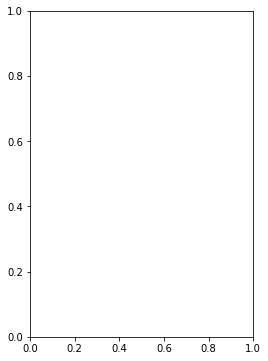

In [31]:
#VirginStock_glass_PVSC_Today
#VirginStock_glass_PVSC_Bifacial

plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keyw='VirginStock_'
materials = ['glass', 'silicon','silver', 'copper', 'aluminium_frames']

fig, axs = plt.subplots(1,1, figsize=(4, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)


# Loop over CASES
name2 = 'PV_ICE_Today'
name0 = 'PV_ICE_Bifacial'
# ROW 2, Aluminum and Silicon:        g-  4 aluminum k - 1 silicon   orange - 3 copper  gray - 2 silver
axs.plot(USyearly[keyw+materials[2]+'_'+name2]*100/mining2020_silver, 
         color = 'gray', linewidth=2.0, label='Silver')

axs.fill_between(USyearly.index, USyearly[keyw+materials[2]+'_'+name0]*100/mining2020_silver, 
                 USyearly[keyw+materials[2]+'_'+name2]*100/mining2020_silver,
                   color='gray', lw=3, alpha=.3)
    

axs.plot(USyearly[keyw+materials[1]+'_'+name2]*100/mining2020_silicon, 
         color = 'k', linewidth=2.0, label='Silicon')
axs.fill_between(USyearly.index, USyearly[keyw+materials[1]+'_'+name0]*100/mining2020_silicon, 
                                USyearly[keyw+materials[1]+'_'+name2]*100/mining2020_silicon,
                   color='k', lw=3, alpha=.5)



axs.plot(USyearly[keyw+materials[4]+'_'+name2]*100/mining2020_aluminum, 
         color = 'g', linewidth=2.0, label='Aluminum')

axs.fill_between(USyearly.index, USyearly[keyw+materials[4]+'_'+name0]*100/mining2020_aluminum, 
                                USyearly[keyw+materials[4]+'_'+name2]*100/mining2020_aluminum,
                   color='g', lw=3, alpha=.3)



axs.plot(USyearly[keyw+materials[3]+'_'+name2]*100/mining2020_copper, 
         color = 'orange', linewidth=2.0, label='Copper')

axs.fill_between(USyearly.index, USyearly[keyw+materials[3]+'_'+name0]*100/mining2020_copper, 
                                USyearly[keyw+materials[3]+'_'+name2]*100/mining2020_copper,
                   color='orange', lw=3, alpha=.3)



axs.set_xlim([2020,2050])
axs.legend()
#axs.set_yscale('log')

axs.set_ylabel('Virgin material needs as a percentage of \n 2020 global mining production capacity [%]')

#fig.savefig(os.path.join(testfolder,'Fig_1x1_MaterialNeeds Ratio to Production_NREL2018.png'), dpi=600)



In [ ]:
bifacial_foo = USyearly[keyw+materials[4]+'_'+name0].iloc[-1]*100/mining2020_aluminum
today_foo = USyearly[keyw+materials[4]+'_'+name2].iloc[-1]*100/mining2020_aluminum
print(today_foo)
print(bifacial_foo)
print("In Year 2050, AL Needs Ratio to Mining Supply REDUCTION Of ", (today_foo-bifacial_foo)*100/today_foo-bifacial_foo)

In [ ]:
bifacial_foo = USyearly[keyw+materials[4]+'_'+name0].sum()*100/mining2020_aluminum
today_foo = USyearly[keyw+materials[4]+'_'+name2].sum()*100/mining2020_aluminum
print(today_foo)
print(bifacial_foo)
print("Cumulative 2020-2050 AL Needs Ratio to Mining Supply REDUCTION Of ", (today_foo-bifacial_foo)*100/today_foo-bifacial_foo)

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'PV_ICE_Today'
name2 = 'PV_ICE_Bifacial'


# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k.', linewidth=5, label='S1: '+name0+' module mass')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='S1: '+name0+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'c.', linewidth=5, label='S2: '+name2+' module mass')
a0.plot(USyearly.index, glassmat, 'c', linewidth=5, label='S2: '+name2+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Virgin Material Needs by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Virgin Material Cumulative Needs 2020-2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))

f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly Virgin Material Needs by Scenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Virgin Needs by 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'PV_ICE_Today'
name2 = 'PV_ICE_Bifacial'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k.', linewidth=5, label='S1: '+name0+' module mass')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='S1: '+name0+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'c.', linewidth=5, label='S2: '+name2+' module mass')
a0.plot(USyearly.index, glassmat, 'c', linewidth=5, label='S2: '+name2+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))

f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


# Waste_ EOL 

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'Irena_EL_Today'
name2 = 'Irena_EL_Bifacial'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Today: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Today: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

a0.legend()
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050_Prev_A = dfcumulations2050.copy()


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
#a1.yaxis.set_visible(False)
a1.yaxis.set_ticklabels([]) 
#a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)



print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



########################    
# SUBPLOT 3
########################
#######################
# Calculate    


cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050_Prev_B = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(0.6, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'Irena_RL_Today'
name2 = 'Irena_RL_Bifacial'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Today: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Today: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

a0.legend()
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050.iloc[1] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_A.iloc[0]

dfcumulations2050_Prev_A = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.yaxis.set_ticklabels([]) 
a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)



print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)

########################    
# SUBPLOT 3
########################
#######################
# Calculate    


cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


dfcumulations2050.iloc[1] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_B.iloc[0]

dfcumulations2050_Prev_B = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(0.6, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



In [ ]:
list(USyearly.keys())

In [ ]:

plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'PV_ICE_Today'
name2 = 'PV_ICE_Bifacial'
#name3 = 'BifacialProjection'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Today: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Today: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

'''
# SCENARIO 3 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name3]+USyearly[keyw+materials[1]+'_'+name3]+
            USyearly[keyw+materials[2]+'_'+name3]+USyearly[keyw+materials[3]+'_'+name3]+
            USyearly[keyw+materials[4]+'_'+name3])
glassmat = (USyearly[keyw+materials[0]+'_'+name3])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'g', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'g', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

'''

a0.legend(loc=2)
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050.iloc[2] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_A.iloc[0]
dfcumulations2050.iloc[1] = dfcumulations2050_Prev_A.iloc[1]

dfcumulations2050_Prev_A = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.yaxis.set_ticklabels([]) 

a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
a1.yaxis.set_ticklabels([]) 
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


########################    
# SUBPLOT 3
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


dfcumulations2050.iloc[2] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_B.iloc[0]
dfcumulations2050.iloc[1] = dfcumulations2050_Prev_B.iloc[1]

dfcumulations2050_Prev_B = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(0.6, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)

f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



In [ ]:
# PLOT FOR PAPER 


plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


#f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})
f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [0.5,0.25,0.25]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'PV_ICE_Today'
name2 = 'PV_ICE_Bifacial'
#name3 = 'BifacialProjection'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Current tech: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Current tech: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Incrased bifacial: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Incrased bifacial: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

'''
# SCENARIO 3 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name3]+USyearly[keyw+materials[1]+'_'+name3]+
            USyearly[keyw+materials[2]+'_'+name3]+USyearly[keyw+materials[3]+'_'+name3]+
            USyearly[keyw+materials[4]+'_'+name3])
glassmat = (USyearly[keyw+materials[0]+'_'+name3])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'g', linestyle='dotted', linewidth=5, label='Incrased bifacial: module')
a0.plot(USyearly.index, glassmat, 'g', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

'''

#a0.title('Yearly')

a0.legend(loc=2)
a0.set_title('Yearly')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050.iloc[2] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_A.iloc[0]
dfcumulations2050.iloc[1] = dfcumulations2050_Prev_A.iloc[1]

dfcumulations2050_Prev_A = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.yaxis.set_ticklabels([]) 

#a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
a1.yaxis.set_ticklabels([]) 
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n'], color='black', rotation=45, fontsize=17)
plt.tick_params(axis='y', which='minor', bottom=False)
plt.title('Current Tech')



print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


########################    
# SUBPLOT 3
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


dfcumulations2050.iloc[2] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_B.iloc[0]
dfcumulations2050.iloc[1] = dfcumulations2050_Prev_B.iloc[1]

dfcumulations2050_Prev_B = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material \nby 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(1.2, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45, fontsize=17)
plt.tick_params(axis='y', which='minor', bottom=False)
plt.title('Increased bifacial')

f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



# Waste_ EOL + MFG

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'Irena_EL_Today'
name2 = 'Irena_EL_Bifacial'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Today: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Today: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

a0.legend()
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050_Prev_A = dfcumulations2050.copy()


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
#a1.yaxis.set_visible(False)
a1.yaxis.set_ticklabels([]) 
#a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)



print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



########################    
# SUBPLOT 3
########################
#######################
# Calculate    


cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050_Prev_B = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(0.6, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'Irena_RL_Today'
name2 = 'Irena_RL_Bifacial'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Today: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Today: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

a0.legend()
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050.iloc[1] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_A.iloc[0]

dfcumulations2050_Prev_A = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.yaxis.set_ticklabels([]) 
a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)



print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)

########################    
# SUBPLOT 3
########################
#######################
# Calculate    


cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


dfcumulations2050.iloc[1] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_B.iloc[0]

dfcumulations2050_Prev_B = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(0.6, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'High\nElec.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,0.8,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name0 = 'PV_ICE_Today'
name2 = 'PV_ICE_Bifacial'
#name3 = 'BifacialProjection'

# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k', linestyle='dotted', linewidth=5, label='Today: module')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='Today: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Bifacial Evolution: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Bifacial Evolution: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)


a0.legend(loc=2)
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

dfcumulations2050.iloc[2] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_A.iloc[0]
dfcumulations2050.iloc[1] = dfcumulations2050_Prev_A.iloc[1]

dfcumulations2050_Prev_A = dfcumulations2050.copy()

## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.yaxis.set_ticklabels([]) 

a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
a1.yaxis.set_ticklabels([]) 
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'Bifacial'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)



print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


########################    
# SUBPLOT 3
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    empty = 0
    matcum.append(empty)
    matcum.append(empty)
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


dfcumulations2050.iloc[2] = dfcumulations2050.iloc[0] 
dfcumulations2050.iloc[0] = dfcumulations2050_Prev_B.iloc[0]
dfcumulations2050.iloc[1] = dfcumulations2050_Prev_B.iloc[1]

dfcumulations2050_Prev_B = dfcumulations2050.copy()


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a2.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a2.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a2.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a2.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a2.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a2.yaxis.set_label_position("right")
a2.yaxis.tick_right()
a2.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a2.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a2.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'),
          bbox_to_anchor=(0.6, -0.25),
          fancybox=True, shadow=True, ncol=5)
a2.set_ylim([0, 28])

plt.sca(a2)
plt.xticks(range(3), ['Irena\nEarly Loss', 'Irena\nRegular Loss', 'PV ICE\n', 'BIFACIAL.'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


f.tight_layout()

fig.savefig(os.path.join(testfolder,'Fig_2x1_Yearly EoL Waste by SCenario and Cumulatives_NREL2018.png'), dpi=600)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)



In [ ]:
USyearly.keys()

# BIFACIAL PROJECTION COMPARISON

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name2 = 'Bifacial_SameInstalls'
name3 = 'Bifacial_ReducedInstalls'

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Same Installs: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Same Installs: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name3]+USyearly[keyw+materials[1]+'_'+name3]+
            USyearly[keyw+materials[2]+'_'+name3]+USyearly[keyw+materials[3]+'_'+name3]+
            USyearly[keyw+materials[4]+'_'+name3])
glassmat = (USyearly[keyw+materials[0]+'_'+name3])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'gold', linestyle='dotted', linewidth=5, label='Reduced Installs: module')
a0.plot(USyearly.index, glassmat, 'gold', linewidth=5, label='Reduced Installs: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)


a0.legend(loc=2)
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name3].loc[2050])
    empty = 0
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
#a1.yaxis.set_ticklabels([]) 

a1.set_ylabel('Cumulative End of Life Material and MFG Scrap \n by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#a1.yaxis.set_ticklabels([]) 
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
#a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(2), ['Same\n Installs\n', 'Reduced\n Installs'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
change = dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


In [ ]:
print("Reduced Installs reduces EOL Material & MFG Scrap landfilled by {} % ".format(round((change[0] - change[1])*100/change[0],2)))



In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name2 = 'Bifacial_SameInstalls'
name3 = 'Bifacial_ReducedInstalls'


# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Same Installs: module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Same Installs: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name3]+USyearly[keyw+materials[1]+'_'+name3]+
            USyearly[keyw+materials[2]+'_'+name3]+USyearly[keyw+materials[3]+'_'+name3]+
            USyearly[keyw+materials[4]+'_'+name3])
glassmat = (USyearly[keyw+materials[0]+'_'+name3])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'gold', linestyle='dotted', linewidth=5, label='Reduced Installs: module')
a0.plot(USyearly.index, glassmat, 'gold', linewidth=5, label='Reduced Installs: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)


a0.legend(loc=2)
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
#a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name3].loc[2050])
    empty = 0
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
#a1.yaxis.set_ticklabels([]) 

a1.set_ylabel('Cumulative Virgin Stock Needs [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#a1.yaxis.set_ticklabels([]) 
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
#a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(2), ['Same\n Installs\n', 'Reduced\n Installs'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)


print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
change1 = dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


In [ ]:
print("Reduction in Manufacturing needs for Reduced Installs of {} %".format(round((change1[0]-change1[1])*100/change1[0],2)))

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2,0.8]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name2 = 'Bifacial_SameInstalls'
name3 = 'Bifacial_ReducedInstalls'


# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'lightcoral', linestyle='dotted', linewidth=5, label='Irena Installs (no MFG losses): module')
a0.plot(USyearly.index, glassmat, 'lightcoral', linewidth=5, label='Irena Installs (no MFG losses):: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name3]+USyearly[keyw+materials[1]+'_'+name3]+
            USyearly[keyw+materials[2]+'_'+name3]+USyearly[keyw+materials[3]+'_'+name3]+
            USyearly[keyw+materials[4]+'_'+name3])
glassmat = (USyearly[keyw+materials[0]+'_'+name3])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'gold', linestyle='dotted', linewidth=5, label='Reduced Installs: module')
a0.plot(USyearly.index, glassmat, 'gold', linewidth=5, label='Reduced Installs: glass')
a0.fill_between(USyearly.index, glassmat, modulemat, color='lightcoral', alpha=0.3,
                 interpolate=True)


a0.legend(loc=2)
#a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
#a0.set_ylim([0, 1.8])
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name3].loc[2050])
    empty = 0
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
#a1.yaxis.set_ticklabels([]) 

a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
#a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#a1.yaxis.set_ticklabels([]) 
#plt.yticks(np.arange(0, 81, 10))
#a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))
#a1.set_ylim([0, 28])


plt.sca(a1)
plt.xticks(range(2), ['\n Irena Installs \n(no MFG losses)) \n', 'Reduced\n Installs'], color='black', rotation=45)
plt.tick_params(axis='y', which='minor', bottom=False)

print("Cumulative Waste by EoL 2050 Million Tones by Scenario")
change2 = dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


In [ ]:
print("Manufacturing Loss represents {} % of Virgin Stock Needs ".format(round((change1[0]-change2[0])*100/change1[0],2)))

# Installed Capacity

In [ ]:
filter_col_Capacity = [col for col in UScum if col.startswith('Capacity')]
filter_col_Capacity

In [ ]:
UScum[filter_col_Capacity].loc[2050]/1e12

In [ ]:
# Sanity Check
plt.plot(UScum['Capacity_Irena_EL_Today']/1e12, 'r', linewidth=4.0, label='Irena Early Loss')
plt.plot(UScum['Capacity_Irena_EL_Bifacial']/1e12, 'b.', linewidth=4.0, label='Irena Regular Loss')
print("No difference in Capacity between Today and Bifacial for Irena", sum(UScum['Capacity_Irena_EL_Today']/1e12-UScum['Capacity_Irena_EL_Bifacial']/1e12))

In [ ]:
"""
p1 = (UScum['new_Installed_Capacity_[MW]BifacialProjection']-
UScum['new_Installed_Capacity_[MW]BifacialProjection_p2'])

UScum['new_Installed_Capacity_[MW]SameInstalls_p2'] = UScum['new_Installed_Capacity_[MW]SameInstalls'] + p1

""" 
pass

In [ ]:
filter_col_newInstalls = [col for col in UScum if col.startswith('new_Installed_Capacity_[MW]')]
UScum[filter_col_newInstalls].loc[2050]/1e6

In [ ]:
list(UScum.keys())

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (7.5, 8)
keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

f, (a0) = plt.subplots(1, 1, gridspec_kw={'width_ratios': [2]})

plt.plot(UScum['new_Installed_Capacity_[MW]_Irena_EL']/1e6, 'k', label='Cumulative New Installs')
plt.plot(UScum['Capacity_Irena_EL_Bifacial']/1e12, 'r', linewidth=4.0, label='Irena EL Reliability')
plt.plot(UScum['Capacity_Irena_RL_Bifacial']/1e12, 'g', linewidth=4.0, label='Irena RL Reliability')#
plt.plot(UScum['Capacity_Bifacial_ReducedInstalls']/1e12, 'gold', linestyle='dashed', linewidth=4.0, label='PV ICE Reduced Installs')
plt.plot(UScum['Capacity_Bifacial_SameInstalls']/1e12, 'lightcoral', linewidth=4.0, label='PV ICE Reliability')

plt.legend()
#plt.yscale('log')
plt.xlim([2020, 2050])
#plt.ylim([5e10, 1e12])
plt.ylabel('Installed Capacity [TW]')


In [ ]:
print("Nameplate Capcaity of Bifacial Installations augment by", (UScum['Capacity_Bifacial_SameInstalls'][2050]-UScum['Capacity_Bifacial_ReducedInstalls'][2050])*100/UScum['Capacity_Bifacial_SameInstalls'][2050])

In [ ]:
print("% loss with Irena EL ")
((UScum['new_Installed_Capacity_[MW]_Irena_EL'].loc[2050]/1e6)-(UScum['Capacity_Irena_EL_Bifacial'].loc[2050]/1e12))*100/(UScum['new_Installed_Capacity_[MW]_Irena_EL'].loc[2050]/1e6)


In [ ]:
print("% loss with Irena RL ")
((UScum['new_Installed_Capacity_[MW]_Irena_RL'].loc[2050]/1e6)-(UScum['Capacity_Irena_RL_Bifacial'].loc[2050]/1e12))*100/(UScum['new_Installed_Capacity_[MW]_Irena_RL'].loc[2050]/1e6)

In [ ]:
print("% loss with PV ICE, Reducing Bifacial Installs ")
((UScum['new_Installed_Capacity_[MW]_Irena_RL'].loc[2050]/1e6)-(UScum['Capacity_Bifacial_ReducedInstalls'].loc[2050]/1e12))*100/(UScum['new_Installed_Capacity_[MW]_Irena_RL'].loc[2050]/1e6)


In [ ]:
print("% loss with PV ICE, Keeping Bifacial Installs ")
((UScum['new_Installed_Capacity_[MW]_Irena_RL'].loc[2050]/1e6)-(UScum['Capacity_Bifacial_SameInstalls'].loc[2050]/1e12))*100/(UScum['new_Installed_Capacity_[MW]_Irena_RL'].loc[2050]/1e6)


# SAVE RESULTS OPENEI

In [ ]:
# WORK ON THIS FOIR OPENEI

keyw=['mat_Virgin_Stock','mat_Total_EOL_Landfilled','mat_Total_MFG_Landfilled', 'mat_Total_Landfilled', 
      'new_Installed_Capacity_[MW]','Installed_Capacity_[W]']
keywprint = ['VirginMaterialDemand','EOLMaterial', 'ManufacturingScrap','ManufacturingScrapAndEOLMaterial',
             'NewInstalledCapacity','InstalledCapacity'] 
keywunits = ['MetricTonnes', 'MetricTonnes', 'MetricTonnes', 'MetricTonnes', 
            'MW','MW']
keywdcumneed = [True,True,True,True,
                True,False]
keywdlevel = ['material','material','material','material',
             'module','module']
keywscale = [1000000, 1000000, 1000000, 1000000,
            1,1e6]
#materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']
materials = ['glass','aluminium_frames','silver','silicon', 'copper']

# Loop over SF Scenarios

scenariolist = pd.DataFrame()

# Loop over Simularionts r1 r2, r3... 
for kk in range(3, len(Simulations)):
    obj = Simulations[kk]

    # Loop over Scenarios
    for zz in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[zz]
        
        foo = pd.DataFrame()
        for jj in range (0, len(keyw)):

            if keywdlevel[jj] == 'material':
                for ii in range (0, len(materials)):    
                    sentit = '@value|'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                    foo[sentit] = obj.scenario[case].material[materials[ii]].materialdata[keyw[jj]]/keywscale[jj] 
            
            else:
                sentit = '@value|'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                #sentit = '@value|'+keywprint[jj]+'#'+keywunits[jj]
                foo[sentit] = obj.scenario[case].data[keyw[jj]]/keywscale[jj] 



        foo['@case'] = case
        foo['@scenario|Module Composition'] = obj.name
        foo['@timeseries|Year'] = obj.scenario[case].data.year

        scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv('OPENEI 4 - Nation by Year.csv', index=False)

print("Done")

In [ ]:
scenariolist

In [ ]:
ReliabilityApproach=['Irena_RL', 'Irena_EL', 'PV_ICE', 'Bifacial_ReducedInstalls', 'Bifacial_SameInstalls']

ReliabilityApproachandScenario=['Irena_RL_Today', 'Irena_RL_Bifacial',
                                'Irena_EL_Today', 'Irena_EL_Bifacial',
                                'PV_ICE_Today','PV_ICE_Today', 
                                'Bifacial_ReducedInstalls', 
                                'Bifacial_SameInstalls']
TodayModuleComposition = ['Irena_RL_Today', 'Irena_EL_Today', 'PV_ICE_Today']
BifacialModuleComposition = ['Irena_RL_Bifacial', 'Irena_EL_Bifacial', 'Bifacial_SameInstalls', 'Bifacial_ReducedInstalls']

In [ ]:
# WORK ON THIS FOIR OPENEI

keyw=['VirginStock','Waste_EOL','Waste_MFG', 'Waste', 
      'new_Installed_Capacity_[MW]','Capacity']
keywprint = ['VirginMaterialDemand','EOLMaterial', 'ManufacturingScrap','ManufacturingScrapAndEOLMaterial',
             'NewInstalledCapacity','InstalledCapacity'] 
keywunits = ['MetricTonnes', 'MetricTonnes', 'MetricTonnes', 'MetricTonnes', 
            'MW','MW']
keywdcumneed = [True,True,True,True,
                True,False]
keywdlevel = ['material','material','material','material',
             'module','module']
keywscale = [1000000, 1000000, 1000000, 1000000,
            1,1e6]
#materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']
materials = ['glass','aluminium_frames','silver','silicon', 'copper','Module']

# Loop over SF Scenarios

scenariolist = pd.DataFrame()

# Loop over Simularionts r1 r2, r3... 
for kk in range(3, len(TodayModuleComposition)):
    obj = Simulations[kk]

        
        foo = pd.DataFrame()
        for jj in range (0, len(keyw)):

            if keywdlevel[jj] == 'material':
                for ii in range (0, len(materials)):    
                    sentit = '@value|'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                    foo[sentit] = obj.scenario[case].material[materials[ii]].materialdata[keyw[jj]]/keywscale[jj] 
            
            else:
                sentit = '@value|'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                #sentit = '@value|'+keywprint[jj]+'#'+keywunits[jj]
                foo[sentit] = obj.scenario[case].data[keyw[jj]]/keywscale[jj] 



        foo['@case'] = case
        foo['@scenario|Solar Futures'] = obj.name
        foo['@timeseries|Year'] = obj.scenario[case].data.year

        scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv('OPENEI 4 - Nation by Year.csv', index=False)

print("Done")

In [ ]:
"""
colNames = result.columns[result.columns.str.contains('|ManufacturingScrap|')] 
result['@value|ManufacturingScrap|Module#MetricTonnes'] = result[colNames].sum(axis=1)

mask = df1['@scenario|Solar Futures']=='SameInstalls'
df1 = df1[~mask]

df1.rename(columns={'@scenario|Solar Futures': '@scenario|Module Composition Scenario'}, inplace=True)

"""

@scenario   @ timeseries    @ value|VirginMateiralDemand|Glass#MEtric Tonnes ........
PVV_ICE             2020
PV_ICE               2030

In [ ]:
# WORK ON THIS FOIR OPENEI

keyw=['mat_Virgin_Stock','mat_Total_EOL_Landfilled','mat_Total_MFG_Landfilled', 'mat_Total_Landfilled', 
      'new_Installed_Capacity_[MW]','Installed_Capacity_[W]']
keywprint = ['VirginMaterialDemand','EOLMaterial', 'ManufacturingScrap','ManufacturingScrapAndEOLMaterial',
             'NewInstalledCapacity','InstalledCapacity'] 
keywunits = ['MetricTonnes', 'MetricTonnes', 'MetricTonnes', 'MetricTonnes', 
            'MW','MW']
keywdcumneed = [True,True,True,True,
                True,False]
keywdlevel = ['material','material','material','material',
             'module','module']
keywscale = [1000000, 1000000, 1000000, 1000000,
            1,1e6]
#materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']
materials = ['glass','aluminium_frames','silver','silicon', 'copper']

# Loop over SF Scenarios

scenariolist = pd.DataFrame()

# Loop over Simularionts r1 r2 ... 
for kk in range(0, len(Simulations)):
    obj = Simulations[kk]

    # Loop over Scenarios
    for zz in range(0, len(obj.scenario)):
        case = list(obj.scenario.keys())[zz]
        
        foo = pd.DataFrame()
        for jj in range (0, len(keyw)):

            if keywdlevel[jj] == 'material':
                for ii in range (0, len(materials)):    
                    sentit = '@value|'+keywprint[jj]+'|'+materials[ii].capitalize() +'#'+keywunits[jj]
                    foo[sentit] = obj.scenario[case].material[materials[ii]].materialdata[keyw[jj]]/keywscale[jj] 
            
            else:
                sentit = '@value|'+keywprint[jj]+'|'+'PV' +'#'+keywunits[jj]
                #sentit = '@value|'+keywprint[jj]+'#'+keywunits[jj]
                foo[sentit] = obj.scenario[case].data[keyw[jj]]/keywscale[jj] 



        foo['@case'] = case
        foo['@scenario|Solar Futures'] = obj.name
        foo['@timeseries|Year'] = obj.scenario[case].data.year

        scenariolist = scenariolist.append(foo)   

cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
cols = [scenariolist.columns[-1]] + [col for col in scenariolist if col != scenariolist.columns[-1]]
scenariolist = scenariolist[cols]
#scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv('OPENEI 4 - Nation by Year.csv', index=False)

print("Done")

In [ ]:
#plt.plot(UScum['new_Installed_Capacity_[MW]BifacialProjection']/1e6, 'k', label='Cumulative New Installs')
#plt.plot(UScum['Capacity_Irena_EL_Bifacial']/1e12, 'r', linewidth=4.0, label='Irena EL Reliability')
#plt.plot(UScum['Capacity_Irena_RL_Bifacial']/1e12, 'g', linewidth=4.0, label='Irena RL Reliability')
#plt.plot(UScum['Capacity_BifacialProjection_SameInstalls']/1e12, 'lightcoral', linewidth=4.0, label='PV ICE Reliability')
#plt.plot(UScum['Capacity_BifacialProjection']/1e12, 'gold', linestyle='dashed', linewidth=4.0, label='PV ICE Reduced Installs')


# WEIBULL PLOTS

In [ ]:
firstgen = r1.scenario['Today'].data.WeibullParams.iloc[0]
ares = PV_ICE.weibull_cdf_vis(firstgen['alpha'],firstgen['beta'])

twentythirtygen = firstgen = r1.scenario['Today'].data.WeibullParams.iloc[-1]
bres = PV_ICE.weibull_cdf_vis(twentythirtygen['alpha'],twentythirtygen['beta'])

#userWeibulls = {'alpha': 3.4,
#               'beta': 4.5}
#userres = PV_ICE.weibull_cdf_vis(userWeibulls['alpha'],userWeibulls['beta'])

# Irena 'EL' 2016
alpha = 2.4928
Lifetime = 30
IrenaEarly = PV_ICE.weibull_cdf_vis(alpha, beta=Lifetime)

# Irena 'RL' 2016
alpha = 5.3759
Lifetime = 30
IrenaReg = PV_ICE.weibull_cdf_vis(alpha, beta=Lifetime)


In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 8)
    
#plt.plot(ares, label=r'$ \alpha $ : '+str(round(firstgen['alpha'],2))+ r' $ \beta $ : '+ str(round(firstgen['beta'],2)) + ' PV ICE, gen 1995')
#plt.plot(bres, color='b', label=r'$ \alpha $ : '+str(round(twentythirtygen['alpha'],2))+ r' $ \beta $ : '+ str(round(twentythirtygen['beta'],2)) + ' PV ICE, gen 2050')
plt.plot(IrenaEarly, color='red', linewidth=16.0, label=r'$ \alpha $ : 2.49, Early Loss Baseline Irena 2016')
#plt.plot(IrenaReg, color='orange', linewidth=4.0, label=r'$ \alpha $ : 5.3759, Regular Loss Baseline Irena 2016')
#plt.legend()
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.xlabel('Years since install')
plt.xlim([0,50])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='bottom');


In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 8)
    
#plt.plot(ares, label=r'$ \alpha $ : '+str(round(firstgen['alpha'],2))+ r' $ \beta $ : '+ str(round(firstgen['beta'],2)) + ' PV ICE, gen 1995')
#plt.plot(bres, color='b', label=r'$ \alpha $ : '+str(round(twentythirtygen['alpha'],2))+ r' $ \beta $ : '+ str(round(twentythirtygen['beta'],2)) + ' PV ICE, gen 2050')
#plt.plot(IrenaEarly, color='red', linewidth=4.0, label=r'$ \alpha $ : 2.49, Early Loss Baseline Irena 2016')
plt.plot(IrenaReg, color='darkgreen', linewidth=16.0, label=r'$ \alpha $ : 5.3759, Regular Loss Baseline Irena 2016')
#plt.legend()
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.xlabel('Years since install')
plt.xlim([0,50])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='bottom');


In [ ]:
from matplotlib.pyplot import gca,show

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 8)
    
plt.plot(ares, linewidth=16.0, label=r'$ \alpha $ : '+str(round(firstgen['alpha'],2))+ r' $ \beta $ : '+ str(round(firstgen['beta'],2)) + ' PV ICE, gen 1995')
plt.plot(bres, linewidth=16.0, color='b', label=r'$ \alpha $ : '+str(round(twentythirtygen['alpha'],2))+ r' $ \beta $ : '+ str(round(twentythirtygen['beta'],2)) + ' PV ICE, gen 2050')
#plt.plot(IrenaEarly, color='red', linewidth=4.0, label=r'$ \alpha $ : 2.49, Early Loss Baseline Irena 2016')
#plt.plot(IrenaReg, color='orange', linewidth=4.0, label=r'$ \alpha $ : 5.3759, Regular Loss Baseline Irena 2016')
#plt.legend()
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.xlabel('Years since install')
plt.xlim([0,50])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


opt = dict(color='r',width=12, headwidth=60, headlength=60)

gca().annotate('',xy=(38,0.5), xycoords='data',xytext =(18,0.5),textcoords = 'data',arrowprops=opt)

#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='bottom');


### TABLES

In [ ]:
# 3 sig figs

USyearly3sig = USyearly.copy()
UScum3sig = UScum.copy()
N = 2

UScum3sig = UScum3sig.drop(UScum3sig.index[0])
USyearly3sig = USyearly3sig.drop(USyearly3sig.index[0])

UScum3sig = UScum3sig.loc[:, ~UScum3sig.columns.str.startswith('Waste_MFG_')]
USyearly3sig = USyearly3sig.loc[:, ~USyearly3sig.columns.str.startswith('Waste_MFG_')]

USyearly3sig = USyearly3sig.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
USyearly3sig = USyearly3sig.applymap(lambda x: int(x))

UScum3sig = UScum3sig.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
UScum3sig = UScum3sig.applymap(lambda x: int(x))


In [ ]:
materials = ['Module','glass', 'aluminium_frames', 'copper', 'silicon', 'silver']
scencases = ['_base', '_high']

print(" Appendix Table I: Metric Tonnes Installed in field in 2030")
print(" ########################################################### \n")
#Loop over scenarios
for zz in range(0, len(scencases)):
    scencase = scencases[zz]
    for kk in range (0, len(objects)):
        obj = objects[kk].name
        print("SCENARIO :", obj),      print("~~~~>>>> Case ", scencase)


        print("********************************")
        print("********************************")

        modulemat = 0
        for ii in range(0, len(materials)):
            installedmat = (UScum3sig['VirginStock_'+materials[ii]+'_'+obj+scencase].loc[2030]-
                  UScum3sig['Waste_'+materials[ii]+'_'+obj+'_base'].loc[2030])
            print(materials[ii], ':', round(installedmat/1000)*1000, 'tons')

        print("Capacity in Year 2030 [GW]:", round(UScum3sig['Capacity_'+obj+scencase].loc[2030]/1e9))
        print("Capacity in Year 2050 [GW]:", round(UScum3sig['Capacity_'+obj+scencase].loc[2050]/1e9))
        print("****************************\n")

In [ ]:
UScum3sig

In [ ]:
print(" WASTE EoL CUMULATIVE RESULTS [Tonnes] ")
print(" ******************************************")
filter_col = [col for col in UScum3sig if (col.startswith('Waste_EOL_Module')) ]
display(UScum3sig[filter_col].loc[[2016,2020,2030, 2040, 2050]])


In [ ]:
UScum['Waste_EOL_Module_PV_ICE_base'].iloc[-1]

In [ ]:
print(" WASTE EoL CUMULATIVE RESULTS [Tonnes] ")
print(" ******************************************")
filter_col = [col for col in UScum if (col.startswith('Waste_EOL_Module')) ]
display(UScum[filter_col].loc[[2016,2020,2030, 2040, 050]])


### Bonus: Bifacial Trend Cumulative Virgin Needs (not plotted, just values)

In [ ]:
name2 = 'bifacialTrend_high'
name0 = 'bifacialTrend_base'

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes
 
print("Cumulative Virgin Needs by 2050 Million Tones by Scenario for Bifacial Trend")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


In [ ]:
name2 = 'Irena_EL_high'
name0 = 'Irena_EL_base'

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes
 
print("Cumulative Virgin Needs by 2050 Million Tones by Scenario for Irena_EL")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


In [ ]:
name2 = 'Irena_RL_high'
name0 = 'Irena_RL_base'

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes
 
print("Cumulative Virgin Needs by 2050 Million Tones by Scenario for Irena_RL")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


### Waste by year

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# loop plotting over scenarios
name2 = 'Simulation1_high'
name0 = 'Simulation1_base'


# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k.', linewidth=5, label='S1: '+name0+' module mass')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='S1: '+name0+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'c.', linewidth=5, label='S2: '+name2+' module mass')
a0.plot(USyearly.index, glassmat, 'c', linewidth=5, label='S2: '+name2+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Material Waste by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative Waste by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly WASTE by Scenario and Cumulatives_NREL2018.png', dpi=600)

print("Cumulative Waste by 2050 Million Tones by case")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# loop plotting over scenarios
name2 = 'Simulation1_high'
name0 = 'Simulation1_base'


# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k.', linewidth=5, label='S1: '+name0+' module mass')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='S1: '+name0+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'c.', linewidth=5, label='S2: '+name2+' module mass')
a0.plot(USyearly.index, glassmat, 'c', linewidth=5, label='S2: '+name2+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Material Waste by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative EOL Only Waste by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly EOL Only WASTE by Scenario and Cumulatives_NREL2018.png', dpi=600)

print("Cumulative Eol Only Waste by 2050 Million Tones by case")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)
